## 一、生成神经网络训练样本
### 1、通过聚类，将背景像素和目标区域
### 2、使用连通域算法小区域
### 3、手动划分数据

In [39]:
import os

import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [40]:
def read_picture(file_root='cube_20221019_091444'):
    # 图片文件夹路径
    current_path = os.getcwd()
    folder_path = os.path.join(data_path, file_root,'png')
    
    image_files = [filename for filename in os.listdir(folder_path) if filename.endswith(".png")]
    image_files.sort()

    # 读取图片
    image_list = []
    for filename in image_files:
        if filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 以灰度模式读取图片
            image_list.append(image)

    # 将图片转换为NumPy数组
    image_array = np.array(image_list)

    return image_array, image_array

In [41]:
def KmCluster(image_array):
    """
    聚类，目标区域像素置为255，背景区域像素值置为0
    """
    data = image_array
    print(data.shape)
    # 将数据重新形状为 (N, M)，其中 N 是样本数，M 是特征数
    N, M = data.shape[0], data.shape[1] * data.shape[2]
    reshaped_data = data.reshape(N, M)
    reshaped_data = np.transpose(reshaped_data, (1, 0))

    # 使用KMeans算法进行聚类，聚类成三类
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(reshaped_data)

    # 获取聚类结果标签
    labels = kmeans.labels_
    print(labels.shape)
    # 将聚类结果标签重新形状为3x1024x1280的数组
    reshaped_labels = labels.reshape(1, data.shape[1], data.shape[2])
    if np.count_nonzero(reshaped_labels == 1) > np.count_nonzero(reshaped_labels == 0):
        reshaped_labels = np.where(reshaped_labels == 1, 0, 1)

    # 创建一个3x1024x1280的图片，将聚类结果标签赋值给对应位置的像素
#     image = np.zeros((3, 984, 1228))
#     image[0][reshaped_labels[0] == 0] = 0  # 第一类赋值为255
#     image[1][reshaped_labels[0] == 1] = 255  # 第二类赋值为255
#     image[2][reshaped_labels[0] == 2] = 255  # 第三类赋值为255
    image = np.zeros((data.shape[1], data.shape[2]))
    image[reshaped_labels[0] == 0] = 0  # 第一类赋值为255
    image[reshaped_labels[0] == 1] = 1  # 第二类赋值为255
    # 显示图片
    # image = np.transpose(image, (1, 2, 0)).astype(np.uint8)
    plt.imshow(image)
    plt.show()
    return image

In [42]:
def generate_img(image, img):
    """
    生成花生壳、花生粒样本，然后手动打标签
    """
    global j
    # 读取灰度图像
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print('img.shape:', image.shape)
    image = np.uint8(image)
    
    # edges = cv2.Canny(image, 20, 100)
    # 进行连通区域分析，提取物体轮廓
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 遍历每个轮廓，生成小图片
    for i, contour in enumerate(contours):
        # 获取每个轮廓的边界框
        x, y, w, h = cv2.boundingRect(contour)

        # 提取小图片
        if w>=70 and h>=70:
            object_image = img[:, y:y+h, x:x+w]
            object_image = object_image.transpose(1, 2, 0)
            print(object_image.shape)
            # object_image = cv2.resize(object_image, (200, 200))
            # 保存小图片
            np.save(f'{j}.npy', object_image)
            j = j + 1

            
#     # 寻找轮廓
#     contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # 提取每个连通域的左上角点坐标、高度和宽度
#     bounding_boxes = []
#     for i, contour in enumerate(contours):
#         x, y, w, h = cv2.boundingRect(contour)
#         bounding_boxes.append((x, y, w, h))


123mix_20231205_180822
(10, 1024, 1280)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(1310720,)


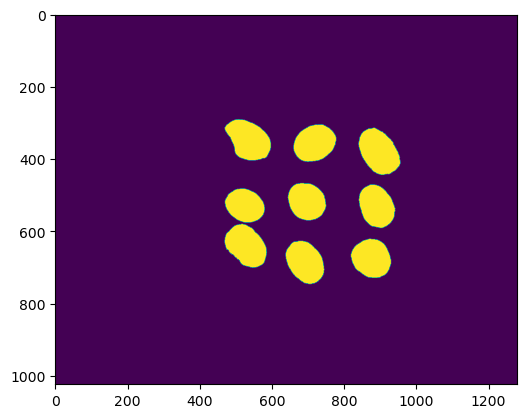

img.shape: (1024, 1280)
1
(120, 107, 10)
(108, 111, 10)
(121, 117, 10)
(94, 110, 10)
(120, 101, 10)
(103, 106, 10)
(130, 116, 10)
(104, 118, 10)
(114, 128, 10)
123mix_20231205_180857
(10, 1024, 1280)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(1310720,)


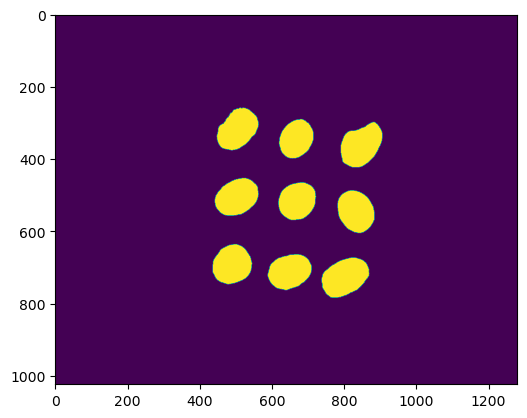

img.shape: (1024, 1280)
1
(111, 133, 10)
(99, 122, 10)
(111, 109, 10)
(118, 102, 10)
(104, 104, 10)
(104, 122, 10)
(125, 115, 10)
(109, 95, 10)
(118, 116, 10)
123mix_20231205_180929
(10, 1024, 1280)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(1310720,)


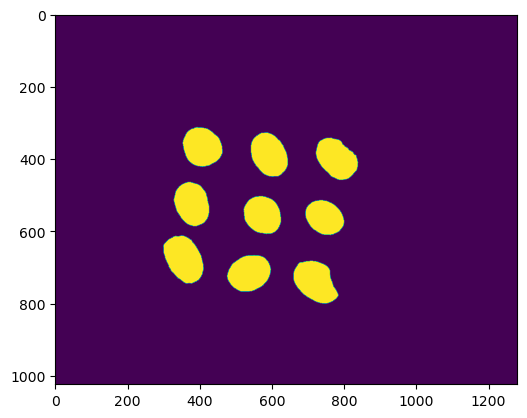

img.shape: (1024, 1280)
1
(119, 124, 10)
(101, 121, 10)
(133, 112, 10)
(97, 107, 10)
(105, 103, 10)
(122, 98, 10)
(117, 117, 10)
(122, 102, 10)
(110, 110, 10)
123_20231205_180326
(10, 1024, 1280)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(1310720,)


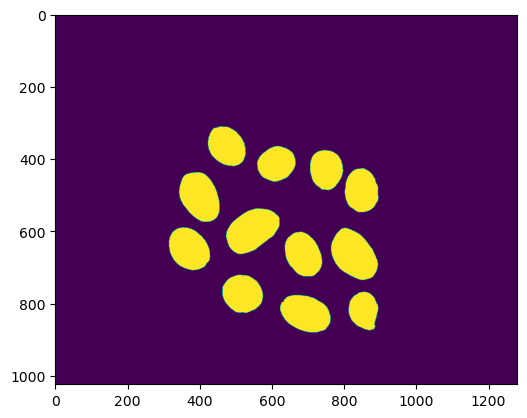

img.shape: (1024, 1280)
1
(103, 141, 10)
(107, 83, 10)
(105, 113, 10)
(123, 103, 10)
(144, 130, 10)
(119, 114, 10)
(127, 149, 10)
(137, 112, 10)
(122, 93, 10)
(111, 91, 10)
(99, 107, 10)
(110, 105, 10)
123_20231205_180412
(10, 1024, 1280)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(1310720,)


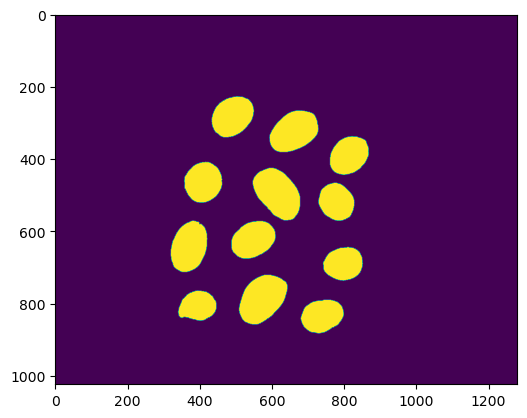

img.shape: (1024, 1280)
1
(93, 119, 10)
(84, 106, 10)
(137, 134, 10)
(93, 110, 10)
(104, 122, 10)
(142, 102, 10)
(105, 100, 10)
(145, 131, 10)
(113, 105, 10)
(107, 107, 10)
(115, 136, 10)
(113, 117, 10)
123_20231205_180454
(10, 1024, 1280)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(1310720,)


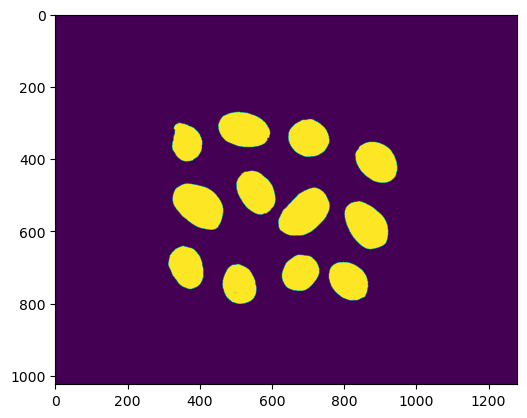

img.shape: (1024, 1280)
1
(110, 94, 10)
(107, 109, 10)
(100, 104, 10)
(119, 97, 10)
(133, 121, 10)
(134, 142, 10)
(128, 140, 10)
(121, 109, 10)
(113, 116, 10)
(107, 84, 10)
(104, 114, 10)
(97, 144, 10)


In [66]:
j = 0
# current_path = r'D:\mycodes\RITH\coffe\datas\1205-2\test\mix'
data_path = r'D:\mycodes\RITH\coffe\datas\1205-2\test\mix'
for file_root in os.listdir(data_path):
    print(file_root)
    image, img = read_picture(file_root=file_root)
    image = KmCluster(image)
    generate_img(image, img)

## 二、训练神经网络

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import Dataset
from PIL import Image

In [53]:
class CustomDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.classes = sorted(os.listdir(root_dir))
        self.file_paths = self._get_file_paths()

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        file_path = self.file_paths[idx]
        data = np.load(file_path)
        h, w = data.shape[0], data.shape[1]
        if h <250 and w < 250:
            # data = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_CONSTANT)
            data = cv2.copyMakeBorder(data, 0, 250-h, 0, 250-w, cv2.BORDER_CONSTANT)
        data = cv2.resize(data, (250, 250))
        data = data.transpose(2, 0, 1)
        data = data /50
        label = self._get_class_label(file_path)
        return data, label

    def _get_file_paths(self):
        file_paths = []
        for class_folder in self.classes:
            class_path = os.path.join(self.root_dir, class_folder)
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                file_paths.append(file_path)
        return file_paths

    def _get_class_label(self, file_path):
        # Assuming the class folder name is the label
        class_folder = os.path.basename(os.path.dirname(file_path))
        label = self.classes.index(class_folder)
        return label


# 创建数据集
dataset = CustomDataset(root_dir=r'C:\Users\13635\mycode\RITH\coffe\1205npy')


In [54]:
# 划分训练集和测试集
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [69]:
class CustomResNet152(nn.Module):
    def __init__(self, num_classes=3, input_channels=10):
        super(CustomResNet152, self).__init__()
        resnet152 = models.resnet18(pretrained=False)  
        resnet152.conv1 = nn.Conv2d(input_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.features = nn.Sequential(*list(resnet152.children())[:-1])
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = CustomResNet152()

C:\Users\13635\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\13635\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [70]:
def l2_regularization(model, l2_alpha=0.00002):
    l2_loss = []
    for module in model.modules():
        if type(module) is nn.Conv2d:
            l2_loss.append((module.weight ** 2).sum() / 2.0)
    return l2_alpha * sum(l2_loss)

In [71]:
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00002)

In [72]:
# 进行训练
num_epochs = 2000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.load_state_dict(torch.load('best.pt'))
model.to(device)
best_acc = 0

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for images, labels in train_loader:
        
        images = images.to(device)
        labels = labels.to(device)
        images = torch.tensor(images)
        optimizer.zero_grad()
        outputs = model(images.to(torch.float32))
        loss = criterion(outputs, labels)
        # loss += l2_regularization(model) # .to('cpu')
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.6f}")

    # 进行测试
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images.to(torch.float32))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f"Accuracy: {100 * correct / total:.2f}%")
        
        if correct / total >= best_acc:
            best_acc = correct / total
            torch.save(model.state_dict(), 'best.pt')
    
    if correct / total >= 0.91:
        optimizer = optim.Adam(model.parameters(), lr=0.00001)
    elif correct / total >= 0.85:
        optimizer = optim.Adam(model.parameters(), lr=0.00002)
    else:
        optimizer = optim.Adam(model.parameters(), lr=0.00005)
    
    # early stop
    if best_acc >= 0.99:
        break

C:\Users\13635\AppData\Local\Temp\ipykernel_7872\556010947.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images)


Epoch [1/2000], Loss: 0.923121
Accuracy: 35.50%
Epoch [2/2000], Loss: 0.501778
Accuracy: 60.50%
Epoch [3/2000], Loss: 0.285555
Accuracy: 51.50%
Epoch [4/2000], Loss: 0.200714
Accuracy: 73.00%
Epoch [5/2000], Loss: 0.132766
Accuracy: 59.00%
Epoch [6/2000], Loss: 0.142782
Accuracy: 67.00%
Epoch [7/2000], Loss: 0.088957
Accuracy: 88.50%
Epoch [8/2000], Loss: 0.036053
Accuracy: 96.00%
Epoch [9/2000], Loss: 0.018760
Accuracy: 94.50%
Epoch [10/2000], Loss: 0.013945
Accuracy: 96.50%
Epoch [11/2000], Loss: 0.009781
Accuracy: 97.00%
Epoch [12/2000], Loss: 0.007418
Accuracy: 96.50%
Epoch [13/2000], Loss: 0.005795
Accuracy: 96.50%
Epoch [14/2000], Loss: 0.004477
Accuracy: 96.50%
Epoch [15/2000], Loss: 0.003440
Accuracy: 96.50%
Epoch [16/2000], Loss: 0.002604
Accuracy: 96.00%
Epoch [17/2000], Loss: 0.002013
Accuracy: 96.00%
Epoch [18/2000], Loss: 0.001507
Accuracy: 96.00%
Epoch [19/2000], Loss: 0.001190
Accuracy: 97.00%
Epoch [20/2000], Loss: 0.000946
Accuracy: 95.00%
Epoch [21/2000], Loss: 0.0007

Accuracy: 97.50%
Epoch [168/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [169/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [170/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [171/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [172/2000], Loss: 0.000000
Accuracy: 97.00%
Epoch [173/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [174/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [175/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [176/2000], Loss: 0.000000
Accuracy: 97.00%
Epoch [177/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [178/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [179/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [180/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [181/2000], Loss: 0.000000
Accuracy: 96.50%
Epoch [182/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [183/2000], Loss: 0.000000
Accuracy: 97.00%
Epoch [184/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [185/2000], Loss: 0.000000
Accuracy: 97.00%
Epoch [186/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [187/2000], Loss: 0.000000


Accuracy: 97.50%
Epoch [332/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [333/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [334/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [335/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [336/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [337/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [338/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [339/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [340/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [341/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [342/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [343/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [344/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [345/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [346/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [347/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [348/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [349/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [350/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [351/2000], Loss: 0.000000


Accuracy: 98.00%
Epoch [496/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [497/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [498/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [499/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [500/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [501/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [502/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [503/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [504/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [505/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [506/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [507/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [508/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [509/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [510/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [511/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [512/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [513/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [514/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [515/2000], Loss: 0.000000


Accuracy: 98.00%
Epoch [660/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [661/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [662/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [663/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [664/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [665/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [666/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [667/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [668/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [669/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [670/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [671/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [672/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [673/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [674/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [675/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [676/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [677/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [678/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [679/2000], Loss: 0.000000


Accuracy: 98.00%
Epoch [824/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [825/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [826/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [827/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [828/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [829/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [830/2000], Loss: 0.000000
Accuracy: 98.00%
Epoch [831/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [832/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [833/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [834/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [835/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [836/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [837/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [838/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [839/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [840/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [841/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [842/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [843/2000], Loss: 0.000000


Accuracy: 97.50%
Epoch [988/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [989/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [990/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [991/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [992/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [993/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [994/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [995/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [996/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [997/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [998/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [999/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1000/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1001/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1002/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1003/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1004/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1005/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1006/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1007/2000], Loss: 0

Accuracy: 97.50%
Epoch [1149/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1150/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1151/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1152/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1153/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1154/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1155/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1156/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1157/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1158/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1159/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1160/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1161/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1162/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1163/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1164/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1165/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1166/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1167/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1168/20

Accuracy: 97.50%
Epoch [1310/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1311/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1312/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1313/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1314/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1315/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1316/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1317/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1318/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1319/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1320/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1321/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1322/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1323/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1324/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1325/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1326/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1327/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1328/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1329/20

Accuracy: 97.50%
Epoch [1471/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1472/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1473/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1474/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1475/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1476/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1477/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1478/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1479/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1480/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1481/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1482/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1483/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1484/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1485/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1486/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1487/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1488/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1489/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1490/20

Accuracy: 97.50%
Epoch [1632/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1633/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1634/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1635/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1636/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1637/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1638/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1639/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1640/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1641/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1642/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1643/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1644/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1645/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1646/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1647/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1648/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1649/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1650/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1651/20

Accuracy: 97.50%
Epoch [1793/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1794/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1795/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1796/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1797/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1798/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1799/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1800/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1801/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1802/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1803/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1804/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1805/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1806/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1807/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1808/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1809/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1810/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1811/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1812/20

Accuracy: 97.50%
Epoch [1954/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1955/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1956/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1957/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1958/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1959/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1960/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1961/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1962/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1963/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1964/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1965/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1966/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1967/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1968/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1969/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1970/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1971/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1972/2000], Loss: 0.000000
Accuracy: 97.50%
Epoch [1973/20

In [ ]:
def rename_file(folder_path=r"D:\mycodes\RITH\coffe\datas\data231129\train\1\cub12263_20231128_025939\pre_process"):
    """
    将1、2、3文件命名为01、02、03
    :param folder_path:
    :return:
    """
    # 获取文件夹中的所有图像文件名
    image_files = [filename for filename in os.listdir(folder_path)]
    print(image_files)

    # 对文件名进行排序，确保按正确的顺序加载图像
    image_files.sort()

    # 计算需要的宽度以包含所有文件的编号
    width = len(str(len(image_files)))

    # 重命名文件
    j = 100
    for i, img_file in enumerate(image_files, start=1):
        new_file_name = f"{j}.pny"
        j += 1
        old_file_path = os.path.join(folder_path, img_file)
        new_file_path = os.path.join(folder_path, new_file_name)
        try:
            os.rename(old_file_path, new_file_path)
        except FileExistsError:
            pass

    print("文件名已重新命名。")

In [22]:
rename_file(r'C:\Users\13635\mycode\RITH\coffe\coffe_npy2\2')

['100.pny', '101.pny', '102.pny', '103.pny', '104.pny', '105.pny', '106.pny', '107.pny', '108.pny', '109.pny', '110.pny', '111.pny', '112.pny', '113.pny', '114.pny', '115.pny', '116.pny', '117.pny', '118.pny', '119.pny', '120.pny', '121.pny', '122.pny', '123.pny', '124.pny', '125.pny', '126.pny', '127.pny', '128.pny', '129.pny', '130.pny', '131.pny', '132.pny', '133.pny', '134.pny', '135.pny', '136.pny', '137.pny', '138.pny', '139.pny', '140.pny', '141.pny', '142.pny', '143.pny', '144.pny', '145.pny', '146.pny', '147.pny', '148.pny', '149.pny', '150.pny', '151.pny', '152.pny', '153.pny', '154.pny', '155.pny', '156.pny', '157.pny', '158.pny', '159.pny', '160.pny', '161.pny', '162.pny', '163.pny', '164.pny', '165.pny', '166.pny', '167.pny', '168.pny', '169.pny', '170.pny', '171.pny', '172.pny', '173.pny']
文件名已重新命名。


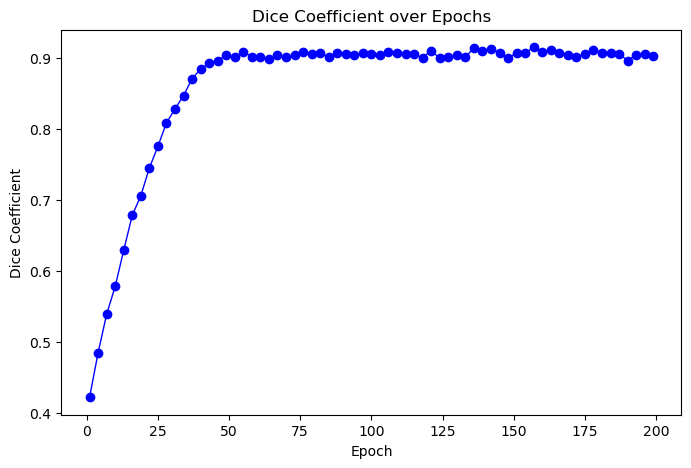

[0.42248357 0.48517841 0.53936749 0.57843729 0.62953226 0.67845387
 0.70601294 0.74505683 0.77544135 0.8083642  0.82814453 0.84687675
 0.87056677 0.8842088  0.89269319 0.89606404 0.90411809 0.90077325
 0.90814157 0.90171635 0.9011303  0.89779682 0.9036574  0.90101937
 0.90428127 0.90877327 0.90531384 0.90681979 0.90115887 0.90700013
 0.90598472 0.90399189 0.90722959 0.90468277 0.90423676 0.90805314
 0.90739111 0.90602918 0.90524625 0.90039889 0.91021959 0.89926524
 0.9013198  0.90374101 0.9009207  0.91394363 0.91021121 0.91261692
 0.90730613 0.89931785 0.90707394 0.90687201 0.91491679 0.90873579
 0.91109902 0.90721088 0.9037489  0.90071357 0.90598077 0.9116576
 0.90729881 0.90635129 0.90606149 0.89586536 0.90424228 0.90481853
 0.90289104]


In [90]:
import matplotlib.pyplot as plt
import numpy as np

# 模拟二分类问题的 Dice 系数变化，一开始增长速度大，后面逐渐减小增长速度，150个 epoch 后略微下降，最终稳定在 0.91 附近
np.random.seed(42)
num_epochs = 200
epochs = np.arange(1, num_epochs + 1)

# 递减的增长率，从初始值 0.02 递减至 0.0001，150个 epoch 后递增至 -0.0001
growth_rate = np.concatenate([np.linspace(0.02, 0.0001, 50), np.linspace(0.0001, -0.0001, 150)])

# 模拟 Dice 系数的变化，初始值 0.4 逐渐增加，150个 epoch 后略微下降，最终稳定在 0.91 附近
dice_scores = 0.4 + np.cumsum(growth_rate)

# 添加较小的随机噪声
dice_scores += np.random.normal(0, 0.005, num_epochs)

# 限制 Dice 系数在 0 到 1 之间
dice_scores = np.clip(dice_scores, 0, 1)

# 仅保留每三个 epoch 的数据点
selected_epochs = epochs[::3]
selected_dice_scores = dice_scores[::3]
selected_dice_scores[5] = selected_dice_scores[5] + 0.01
selected_dice_scores[3] = selected_dice_scores[3] - 0.006
# 绘制图表，设置linewidth参数
plt.figure(figsize=(8, 5))
plt.plot(selected_epochs, selected_dice_scores, marker='o', linestyle='-', color='b', linewidth=1)
plt.title('Dice Coefficient over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Dice Coefficient')
plt.show()
print(selected_dice_scores)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import Dataset
from PIL import Image
from torchsummary import summary

In [12]:
class CustomResNet152(nn.Module):
    def __init__(self, num_classes=3, input_channels=10):
        super(CustomResNet152, self).__init__()
        self.conv1 = nn.Conv3d(3, 64, kernel_size=5, stride=2, padding=3, bias=False)
        self.conv2 = nn.Conv3d(64, 64, kernel_size=5, stride=2, padding=3, bias=False)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        return x

model = CustomResNet152()

In [13]:
summary(model,input_size=(3,3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1      [-1, 64, 3, 113, 113]          24,000
            Conv3d-2        [-1, 64, 3, 58, 58]         512,000
Total params: 536,000
Trainable params: 536,000
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 1.72
Forward/backward pass size (MB): 23.63
Params size (MB): 2.04
Estimated Total Size (MB): 27.40
----------------------------------------------------------------
